In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from ipywidgets import widgets
from sklearn.model_selection import train_test_split

# Cargar dataset
df_partidos = pd.read_csv('datos_cebollitas.csv')

df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
df_partidos['ratio_tiros_posesion_local'] = df_partidos['tiros_arco_local'] / df_partidos['posesion_local (%)']

df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_tiros_posesion_local
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2,0.222222
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML,-4,0.200000
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1,0.181818
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas,-1,0.052632
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2,0.134615


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df_partidos[['posesion_local (%)', 'tiros_arco_local']],
    df_partidos['diferencia_goles'],
    test_size=0.2,
    random_state=42
)

print("conjunto de entrenamiento:")
display(X_train.head())

print("conjunto de prueba:")
display(X_test.head())

conjunto de entrenamiento:


,posesion_local (%),tiros_arco_local
55,51,6
88,54,9
26,53,4
42,52,4
69,60,9


conjunto de prueba:


,posesion_local (%),tiros_arco_local
83,47,3
53,60,3
70,50,5
45,57,7
44,45,5


In [6]:
from sklearn.linear_model import LinearRegression

modelo_rl = LinearRegression()

modelo_rl.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
print("Intercepto:", modelo_rl.intercept_)
print("Coeficientes:", modelo_rl.coef_)

for idx, col_name in enumerate(X_train.columns):
    print(f"Si aumentas 1 unidad en {col_name}, la diferencia de goles cambia en {modelo_rl.coef_[idx]}")

Intercepto: -2.525719257232977
Coeficientes: [ 0.05596278 -0.05125811]
Si aumentas 1 unidad en posesion_local (%), la diferencia de goles cambia en 0.05596278439289743
Si aumentas 1 unidad en tiros_arco_local, la diferencia de goles cambia en -0.05125811160380858


In [9]:
y_pred = modelo_rl.predict(X_test)

df_resultados = X_test.copy()
df_resultados['diferencia_goles_real'] = y_test
df_resultados['diferencia_goles_pred'] = y_pred.round(2)

df_resultados.head()

,posesion_local (%),tiros_arco_local,diferencia_goles_real,diferencia_goles_pred
83,47,3,3,-0.05
53,60,3,3,0.68
70,50,5,0,0.02
45,57,7,3,0.31
44,45,5,5,-0.26


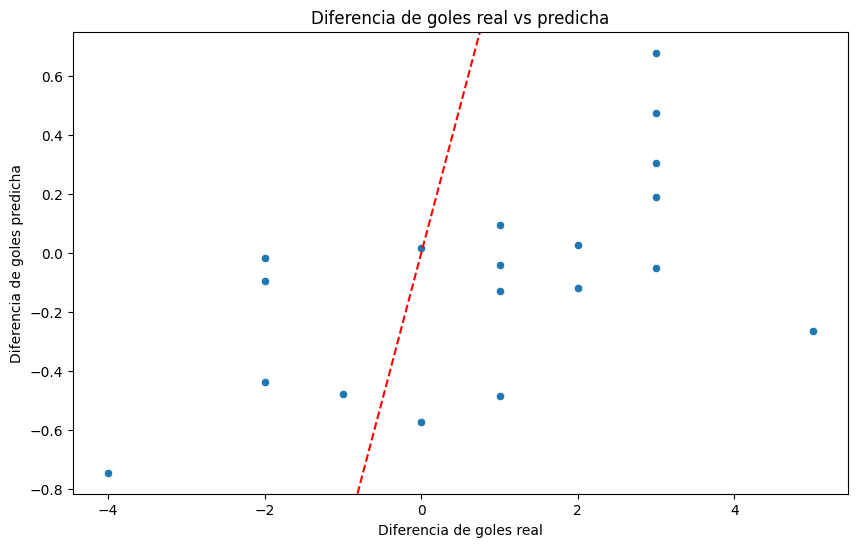

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Diferencia de goles real')
plt.ylabel('Diferencia de goles predicha')
plt.title('Diferencia de goles real vs predicha')
plt.axline((0,0), slope=1, color='red', linestyle='--')
plt.show()

In [11]:
import ipywidgets as widgets

posesion_imput = widgets.FloatSlider(min=30, max=70, step=1, value=50, description='Posesión (%)')
tiros_imput = widgets.IntSlider(min=1, max=15, step=1, value=10, description='Tiros a arco')

def predecir_goles(posesion, tiros):
    entrada = pd.DataFrame({'posesion_local (%)': [posesion], 'tiros_arco_local': [tiros]})
    pred = modelo_rl.predict(entrada)
    print(f'Predicción de diferencia de goles: {pred[0]:.2f}')

widgets.interact(predecir_goles, posesion=posesion_imput, tiros=tiros_imput)

interactive(children=(FloatSlider(value=50.0, description='Posesión (%)', max=70.0, min=30.0, step=1.0), IntSl…

<function __main__.predecir_goles(posesion, tiros)>